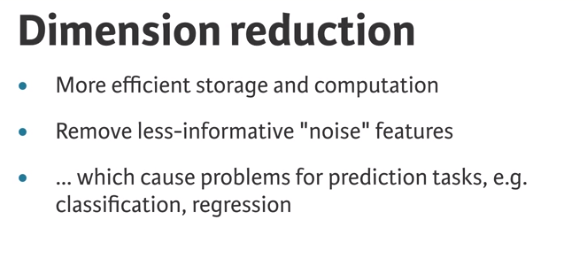

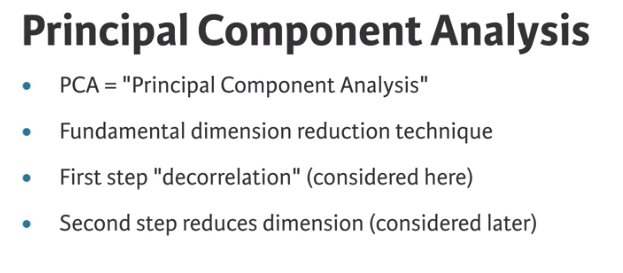

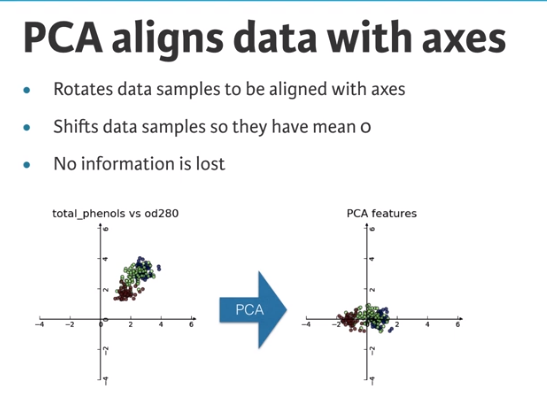

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

In [2]:
!wget https://assets.datacamp.com/production/repositories/655/datasets/bb87f0bee2ac131042a01307f7d7e3d4a38d21ec/Grains.zip

--2020-02-13 16:09:11--  https://assets.datacamp.com/production/repositories/655/datasets/bb87f0bee2ac131042a01307f7d7e3d4a38d21ec/Grains.zip
Resolving assets.datacamp.com (assets.datacamp.com)... 13.227.185.48, 13.227.185.52, 13.227.185.51, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.227.185.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4952 (4.8K)
Saving to: ‘Grains.zip’

Grains.zip          100%[===================>]   4.84K  --.-KB/s    in 0s      

2020-02-13 16:09:11 (293 MB/s) - ‘Grains.zip’ saved [4952/4952]



In [3]:
!unzip Grains.zip

Archive:  Grains.zip
   creating: Grains/
  inflating: Grains/seeds-width-vs-length.csv  
  inflating: Grains/seeds.csv        


In [4]:
!ls

'Clustering fish marker.ipynb'
'Clustering for dataset exploration.ipynb'
'Clustering stocks using KMeans.ipynb'
 Grains
 Grains.zip
 tSNE.ipynb
 TSNE.ipynb
'Visualizing the PCA transformation.ipynb'


In [5]:
import pandas as pd
df = pd.read_csv('Grains/seeds.csv')

In [6]:
df.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [7]:
grains = df.drop('1', axis=1).values

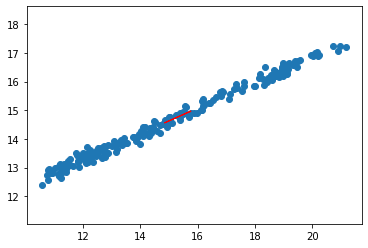

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

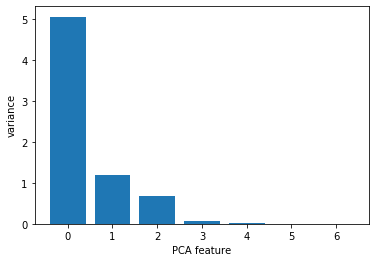

In [12]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(grains)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()